In [9]:
import os
import requests

url = "https://raw.githubusercontent.com/zayaanmoez/eda-weather-aus/master/weatherAUS.csv"
strFile = "weatherAUS.csv"

# Verifica si el archivo ya existe
if not os.path.isfile(strFile):
    response = requests.get(url)

    if response.status_code == 200:
        with open(strFile, "wb") as file:
            file.write(response.content)
        print("Archivo descargado correctamente.")
    else:
        print("Error al descargar el archivo.")
else:
    print("El archivo ya existe.")


El archivo ya existe.


**Integrantes:**

- Nelson Navarro

- Rodrigo Valdés

- Agustín Rivero

- Diego Canales

**Target**: Predecir temperatura maxima de 3 ciudades especificas (darwin, alicesprings, bayarat)

ciudades hubicadas en el norte, sur y centro

# Etapa1 entendimiento del negocio



## Contexto General:
---
Los gráficos a presentar reflejan las localizaciones en las que se presentaron diversos climas detalladamente pasando de climas desérticos a climas muy lluviosos, por ejemplo el el primer gráfico da detalladamente en una gran cantidad de ciudades de Australia entre los años 2013 al año 2016 dando a conocer la proporción de días que hubieron lluvias tomando como conclusión que este país como promedio anual llueve muy poco; los gráficos presentados serán importantes para graficar y dar a conocer los hechos dichos anteriormente presentados en distintos tipos de formas y abordando los climas en general en Australia y en sus ciudades tratando de buscar anormalidades o algún riesgo que pueda manifestarse a través de los datos que se fueron recopilando a través de los años que haga evidencia de algún parámetro que llegue a ser anormal en su ecosistema como por ejemplo lo que tuvo lugar el 2013 ya que la temperatura en Australia rompió el récord al país más caluroso enfrentados a una sequía que seguiría empeorando aún más el año 2015 que fue el año con menos precipitaciones obligando al gobierno Australiano en ciertos casos reutilizar el agua.


# Etapa 2 estudio y comprension de los datos

In [10]:
#@title importando librerias que se utilizan
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [11]:
import pandas as pd
pdData = pd.read_csv(strFile) # leer archivo

In [12]:
pdData #leer archivo de forma general

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


Da a conocer los detalles generales ordenados con la informacion que hay en la tabla pdData haciendo referencias a todos las categorias que se refieren para el caso de el clima en general que hay en Australia

In [13]:
pdData.head() #Lee archivo de forma general mostrando solamente los primeros 5 datos registrados

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


Pequeño vistaso general de los primeros o primeras 5 datos registradas en la columnas asignandolas de forma precisa del dia, año y mes que se registraron esos parametros

In [14]:
pdData.shape #Da a conocer el numero de filas y columnas de pdData

(142193, 24)

Con la funcion shape podemos ver la cantidad de filas y columnas, existen 142.193 filas y 24 columnas

In [15]:
pdData.corr() #Saca la correlacion de todas las columnas en pdData

<ipython-input-15-cd09e140b737>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pdData.corr() #Saca la correlacion de todas las columnas en pdData


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
MinTemp,1.000000,0.736267,0.104255,0.467261,0.072961,0.177285,0.176005,0.175749,-0.234211,0.005999,-0.451260,-0.461623,0.077625,0.020489,0.901813,0.708865,0.124743
MaxTemp,0.736267,1.000000,-0.074839,0.588915,0.469967,0.067690,0.014680,0.050800,-0.505432,-0.509270,-0.332293,-0.427279,-0.289865,-0.279053,0.887020,0.984562,-0.044208
Rainfall,0.104255,-0.074839,1.000000,-0.064549,-0.227525,0.133497,0.086816,0.057759,0.223725,0.255312,-0.168085,-0.126728,0.198195,0.171993,0.011477,-0.079178,0.308557
Evaporation,0.467261,0.588915,-0.064549,1.000000,0.366607,0.203001,0.193936,0.128895,-0.505890,-0.392785,-0.269907,-0.293160,-0.185032,-0.184287,0.545497,0.574275,-0.043498
Sunshine,0.072961,0.469967,-0.227525,0.366607,1.000000,-0.032831,0.008040,0.056012,-0.491603,-0.629122,0.040959,-0.020464,-0.675610,-0.704202,0.291139,0.490180,-0.294973
WindGustSpeed,0.177285,0.067690,0.133497,0.203001,-0.032831,1.000000,0.604837,0.686419,-0.215461,-0.026663,-0.457891,-0.412922,0.071235,0.109088,0.150258,0.032970,0.162923
WindSpeed9am,0.176005,0.014680,0.086816,0.193936,0.008040,0.604837,1.000000,0.519971,-0.270807,-0.031607,-0.227923,-0.174916,0.024280,0.053584,0.129298,0.005108,0.069404
WindSpeed3pm,0.175749,0.050800,0.057759,0.128895,0.056012,0.686419,0.519971,1.000000,-0.145942,0.015903,-0.295567,-0.254988,0.052780,0.025269,0.163601,0.028567,0.049240
Humidity9am,-0.234211,-0.505432,0.223725,-0.505890,-0.491603,-0.215461,-0.270807,-0.145942,1.000000,0.667388,0.139519,0.186955,0.452182,0.358043,-0.472826,-0.499777,0.172417
Humidity3pm,0.005999,-0.509270,0.255312,-0.392785,-0.629122,-0.026663,-0.031607,0.015903,0.667388,1.000000,-0.027449,0.051840,0.517037,0.523270,-0.221467,-0.557989,0.313183


Muestra los datos basados en su correlacion en el caso del tiempo en Australia mediante las tablas que estan registradas en pdData

In [16]:
pdData.RainToday.unique() #Revisa los valores unicos en "RainToday"

array(['No', 'Yes', nan], dtype=object)

In [17]:
pdData.groupby('Location')['RainToday'].size() #Agrupa las columnas Location y Raintoday

Location
Adelaide            3090
Albany              3016
Albury              3011
AliceSprings        3031
BadgerysCreek       2928
Ballarat            3028
Bendigo             3034
Brisbane            3161
Cairns              2988
Canberra            3418
Cobar               2988
CoffsHarbour        2953
Dartmoor            2943
Darwin              3192
GoldCoast           2980
Hobart              3188
Katherine           1559
Launceston          3028
Melbourne           2435
MelbourneAirport    3009
Mildura             3007
Moree               2854
MountGambier        3030
MountGinini         2907
Newcastle           2955
Nhil                1569
NorahHead           2929
NorfolkIsland       2964
Nuriootpa           3002
PearceRAAF          2762
Penrith             2964
Perth               3193
PerthAirport        3009
Portland            2996
Richmond            2951
Sale                3000
SalmonGums          2955
Sydney              3337
SydneyAirport       3005
Townsville      

Se da a conocer especificamente los datos de la columna RainToday mostrandolos con su respectiva ciudad

In [18]:
pdData.groupby('Location')['MinTemp'].mean() #Agrupa las columnas para saber la temperatura minima


Location
Adelaide            12.628368
Albany              12.948461
Albury               9.520899
AliceSprings        13.125182
BadgerysCreek       11.136900
Ballarat             7.355302
Bendigo              8.591065
Brisbane            16.410998
Cairns              21.199197
Canberra             6.827688
Cobar               13.120342
CoffsHarbour        14.365774
Dartmoor             8.619816
Darwin              23.210530
GoldCoast           17.341490
Hobart               9.079141
Katherine           20.534983
Launceston           7.833818
Melbourne           11.788127
MelbourneAirport     9.973945
Mildura             10.733954
Moree               12.786255
MountGambier         8.827468
MountGinini          3.651193
Newcastle           13.740240
Nhil                 8.992798
NorahHead           15.375197
NorfolkIsland       16.839960
Nuriootpa            9.366433
PearceRAAF          12.386314
Penrith             12.533649
Perth               12.922706
PerthAirport        12.580359
P

Se hace el registro para saber cual fue el promedio de  temperatura minima registrada en sus respectivas ciudades con sus temperatudas que fueron registradas

In [19]:
pdData.groupby('Location')['MaxTemp'].mean() #Agrupa las columnas para saber la temperatura maxima

Location
Adelaide            22.945402
Albany              20.072587
Albury              22.630963
AliceSprings        29.244191
BadgerysCreek       24.023111
Ballarat            18.274794
Bendigo             21.616683
Brisbane            26.441527
Cairns              29.544344
Canberra            20.980644
Cobar               25.834081
CoffsHarbour        23.915575
Dartmoor            19.694427
Darwin              32.540977
GoldCoast           25.752971
Hobart              17.866677
Katherine           34.939037
Launceston          18.956231
Melbourne           20.860148
MelbourneAirport    20.491858
Mildura             24.841536
Moree               26.886861
MountGambier        19.828128
MountGinini         11.777947
Newcastle           24.098283
Nhil                22.398407
NorahHead           22.607900
NorfolkIsland       21.792746
Nuriootpa           21.714658
PearceRAAF          26.271049
Penrith             24.731984
Perth               25.034837
PerthAirport        25.533234
P

Se hace el registro para saber cual fue el promedio temperatura maxima registrada en sus respectivas ciudades con sus temperatudas que fueron registradas

In [20]:
pdData['Location'].value_counts() #Cuenta las ocurrencias de cada Location

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928


In [21]:
pdData.info() #da una vista general y precisa de pdData

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

Se da aconocer de forma ordenada de cada columna la cantidad de datos non-null con su respectivo Count y muestra de que formato estan escritos a travez del Dtype

In [22]:
#@title Contando los nulos de las columnas
for feature in pdData.columns:
    flaNull = pdData[feature].isna().sum()#suma de los null
    flaNoNull = pdData[feature].notna().sum()#suma de los no null
    flaTotal = flaNoNull + flaNull # total de los datos
    flaPorcentaje = (flaNull/ flaTotal) * 100 # calculando el porcentaje de nulos
    #imprimiendo mensaje
    print(f'Valores nulos y no nulos de {feature}:\nTotal de valores nulos:{flaNull}\nTotal de valores no nulos: {flaNoNull}')
    print(f"los nulos representan el {round(flaPorcentaje,2)}% \n")

Valores nulos y no nulos de Date:
Total de valores nulos:0
Total de valores no nulos: 142193
los nulos representan el 0.0% 

Valores nulos y no nulos de Location:
Total de valores nulos:0
Total de valores no nulos: 142193
los nulos representan el 0.0% 

Valores nulos y no nulos de MinTemp:
Total de valores nulos:637
Total de valores no nulos: 141556
los nulos representan el 0.45% 

Valores nulos y no nulos de MaxTemp:
Total de valores nulos:322
Total de valores no nulos: 141871
los nulos representan el 0.23% 

Valores nulos y no nulos de Rainfall:
Total de valores nulos:1406
Total de valores no nulos: 140787
los nulos representan el 0.99% 

Valores nulos y no nulos de Evaporation:
Total de valores nulos:60843
Total de valores no nulos: 81350
los nulos representan el 42.79% 

Valores nulos y no nulos de Sunshine:
Total de valores nulos:67816
Total de valores no nulos: 74377
los nulos representan el 47.69% 

Valores nulos y no nulos de WindGustDir:
Total de valores nulos:9330
Total de va

Ayuda aver los valores ordenados de cada parametro en pdData dando a conocer los nulos, no-nulos y el porcentaje que representan entre ellos respectivamente

In [23]:
pdData.nunique() #Revela la cantidad de valores unicos

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          679
Evaporation       356
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           440
Temp3pm           500
RainToday           2
RISK_MM           681
RainTomorrow        2
dtype: int64

In [24]:
pdData.describe(include="all")# Se le agrega el valor "all" para obtener informacion adicional de las tablas pdData mostrando las columnas numericas y categoricas

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
count,142193,142193,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132863,132923.000000,132180,...,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,140787,142193.000000,142193
unique,3436,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2
top,2013-12-01,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No
freq,49,3418,NaN,NaN,NaN,NaN,NaN,9780,NaN,11393,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109332,NaN,110316
mean,NaN,NaN,12.186400,23.226784,2.349974,5.469824,7.624853,NaN,39.984292,NaN,...,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,NaN,2.360682,NaN
std,NaN,NaN,6.403283,7.117618,8.465173,4.188537,3.781525,NaN,13.588801,NaN,...,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,NaN,8.477969,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,...,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,NaN,0.000000,NaN
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.900000,NaN,31.000000,NaN,...,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,NaN,0.000000,NaN
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.500000,NaN,39.000000,NaN,...,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,NaN,0.000000,NaN
75%,NaN,NaN,16.800000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,...,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,NaN,0.800000,NaN


Se da un vistaso general mediante el metodo "describe" que da la informacion de la tabla mostrando las columnas numericas y categoricas sepadandolas por el cuartil

In [25]:
pdData.groupby('MinTemp')['MaxTemp'].size() #Agrupacion de las columnas MinTemp y MaxTemp

MinTemp
-8.5     1
-8.2     2
-8.0     2
-7.8     1
-7.6     2
        ..
 31.2    1
 31.4    3
 31.8    1
 31.9    1
 33.9    1
Name: MaxTemp, Length: 389, dtype: int64

# Etapa 2 Modificando los datos

In [26]:
#@title creando variable Year y Month y filtrado de datos
pdFiltrado = pdData[['Date', 'RainToday', 'MinTemp', 'MaxTemp','Location']].copy() # se crea la variable que es una copia especifica de los datos seleccionados

In [27]:
# creando variables Year a partir del texto de Date para filtrar y agrupar mas facil los datos por año
pdFiltrado['Year'] = pdFiltrado['Date'].str.slice(0, 4).astype(int)

In [28]:
# creando variables Month a partir del texto de Date para filtrar y manipular de forma mas simple los meses
pdFiltrado['Month'] = pdFiltrado['Date'].str.slice(5, 7).astype(int)

In [29]:
# cambiando los datos a 1 y 0 para facilitar su manipulacion y conteo de los datos
pdFiltrado['RainToday'] = pdFiltrado['RainToday'].fillna('No').replace({'Yes': 1, 'No': 0, 'NaN':0})

In [30]:
# Rellenando datos nulos con un promedio, segun el mes del año y su ciudad evitando promedio por todas las ciudades y por todos los años
pdFiltrado[['MinTemp', 'MaxTemp']] = pdFiltrado.groupby(['Location', 'Year', 'Month'])[['MinTemp', 'MaxTemp']].transform(lambda x: x.fillna(x.mean()))

In [31]:
pdFiltrado.groupby(['Year']).size() #Cantidad de datos por año

Year
2007       61
2008     2246
2009    16595
2010    16419
2011    15126
2012    15044
2013    16097
2014    17400
2015    17231
2016    17508
2017     8466
dtype: int64

Debido ala pequeña cantidad de datos del año 2007 se decidio ignorar ese año debido ala poca cantidad de datos

In [32]:
# Filtrar los datos para excluir el año 2007
pdFiltrado = pdFiltrado[pdFiltrado['Year'] != 2007]

In [57]:
# se boran los valores nulos ya que los valores que quedan solo son 1 de minTemp y maxTemp
pdFiltrado = pdFiltrado.dropna()

In [34]:
pdFiltrado #Llama a la tabla que se formo con el proceso anterior

,Date,RainToday,MinTemp,MaxTemp,Location,Year,Month
0,2008-12-01,0,13.4,22.9,Albury,2008,12
1,2008-12-02,0,7.4,25.1,Albury,2008,12
2,2008-12-03,0,12.9,25.7,Albury,2008,12
3,2008-12-04,0,9.2,28.0,Albury,2008,12
4,2008-12-05,0,17.5,32.3,Albury,2008,12
...,...,...,...,...,...,...,...
142188,2017-06-20,0,3.5,21.8,Uluru,2017,6
142189,2017-06-21,0,2.8,23.4,Uluru,2017,6
142190,2017-06-22,0,3.6,25.3,Uluru,2017,6
142191,2017-06-23,0,5.4,26.9,Uluru,2017,6


In [35]:
#@title Contando los nulos de las columnas filtradas
#@markdown cuantos nulos hay en cada columna y su porcentaje
for feature in pdFiltrado.columns:
    flaNull = pdFiltrado[feature].isna().sum()#suma de los null
    flaNoNull = pdFiltrado[feature].notna().sum()#suma de los no null
    flaTotal = flaNoNull + flaNull # total de los datos
    flaPorcentaje = (flaNull/ flaTotal) * 100 # calculando el porcentaje de nulos
    #imprimiendo mensaje
    print(f'Valores nulos y no nulos de {feature}:\nTotal de valores nulos: {flaNull}\nTotal de valores no nulos: {flaNoNull}')
    print(f"los nulos representan el {round(flaPorcentaje,2)}% \n")

Valores nulos y no nulos de Date:
Total de valores nulos: 0
Total de valores no nulos: 142131
los nulos representan el 0.0% 

Valores nulos y no nulos de RainToday:
Total de valores nulos: 0
Total de valores no nulos: 142131
los nulos representan el 0.0% 

Valores nulos y no nulos de MinTemp:
Total de valores nulos: 0
Total de valores no nulos: 142131
los nulos representan el 0.0% 

Valores nulos y no nulos de MaxTemp:
Total de valores nulos: 0
Total de valores no nulos: 142131
los nulos representan el 0.0% 

Valores nulos y no nulos de Location:
Total de valores nulos: 0
Total de valores no nulos: 142131
los nulos representan el 0.0% 

Valores nulos y no nulos de Year:
Total de valores nulos: 0
Total de valores no nulos: 142131
los nulos representan el 0.0% 

Valores nulos y no nulos de Month:
Total de valores nulos: 0
Total de valores no nulos: 142131
los nulos representan el 0.0% 



Acá se presentan distintas medidas estadísticas conseguidas a partir del análisis de las temperaturas máximas, mínimas, y los días que hubieron lluvia; los datos extraídos fueron los siguientes:
- El número total de valores de los 3 datos extraídos
- El promedio total obtenido de los distintos valores
- La desviación estándar de los valores obtenidos
- El valor mínimo de los datos
- El cuartil del 25%
- El cuartil del 50% de los dato
- El cuartil del 75% de los datos
- El valor máximo de los datos


In [36]:
 pdFiltrado[['MinTemp', 'MaxTemp', 'RainToday']].describe() #imprimiendo el describe de los siguientes datos mintemp, maxTemp y rainToday

,MinTemp,MaxTemp,RainToday
count,142131.000000,142131.000000,142131.000000
mean,12.188382,23.227168,0.221176
std,6.402809,7.116098,0.415040
min,-8.500000,-4.800000,0.000000
25%,7.600000,17.900000,0.000000
50%,12.000000,22.600000,0.000000
75%,16.888231,28.200000,0.000000
max,33.900000,48.100000,1.000000


En la siguiente tabla se presentan las distintas locaciones dentro de Australia, junto con la cantidad de datos divididos por el criterio de los días en que llovió, y en los días que no llovió.

In [37]:
pdFiltrado.groupby(['RainToday','Location']).size() #Agrupacion de Raintoday por Location

RainToday  Location     
0          Adelaide         2414
           Albany           2123
           Albury           2396
           AliceSprings     2790
           BadgerysCreek    2356
                            ... 
1          Watsonia          734
           Williamtown       635
           Witchcliffe       871
           Wollongong        704
           Woomera           201
Length: 98, dtype: int64

Se muestra en el codigo las cuidades en que RainToday con pdFiltrado ayudando y proporcionando datos manipulados anteriormente

# etapa 3 Modelando los datos

#Descripción gráfico 1

---
En el gráfico se puede observar cómo a medida que pasan los años, las lluvias en las ciudades suelen variar entre 20 y 40 días con lluvia a lo mucho. Pero se observa que en una ciudad en particular la cual es la ciudad de ballarat en la cual practicamente no llovio, esta variación fué mucho más alta y según nuestra investigación, se debió a que el año 2015 en Australia fue uno de los más calurosos globalmente aunque este patrón de decadencia se espera con tal situación, no se repite en otras ciudades como se creería. También se puede observar que a comparación de otros años, la cantidad de lluvia subió o se mantuvo en la mayoría de las ciudades, con solo algunas que registraron pérdidas.


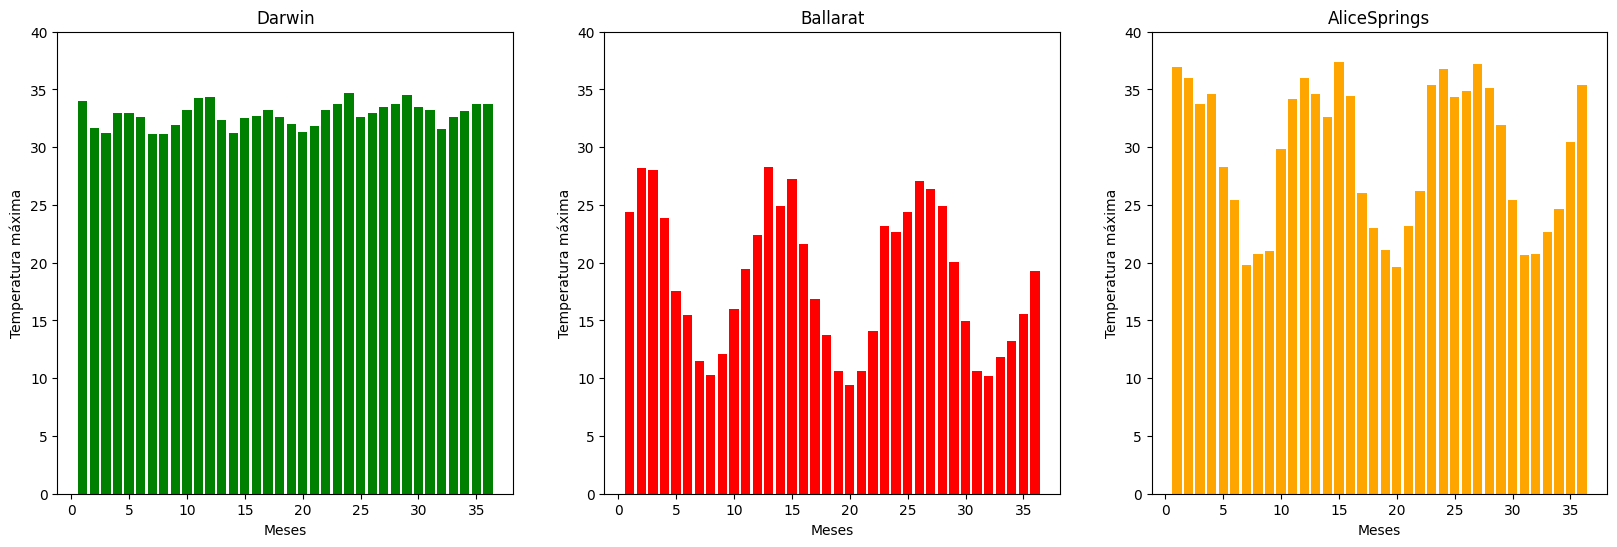

In [39]:
#@title Gráfico de barras (temperatura máxima)
#Lista de las ciudades
lstCiudades = ['Darwin','Ballarat','AliceSprings']

# Lista con los años que se quieren graficar
lstYears = list(range(2014,2017))
# Generando variables de matplotlib y asignando una dimensión de 10:6
fig, ax = plt.subplots(1,3,figsize=(20,6))

# colores que se usaran para cada ciudad
colores=['green','red','orange']
mes = 1 # se crea la variable meses para usarlo en el ciclo for
#ciclo for que recorre los años de la lista
for year in lstYears:
  co=0 # esta variable es para usarlo en colores
  for ciudad in lstCiudades: # otro ciclo for que este recorre la lista de las ciudades
  # capturando los datos de maximo de temperatura por ciudad,
    pdCiudad = pdFiltrado[(pdFiltrado['Year'] == year) & (pdFiltrado['Location'] == 'Darwin')][['Month', 'MaxTemp']].groupby(['Month']).mean()
    pdCiudad1 = pdFiltrado[(pdFiltrado['Year'] == year) & (pdFiltrado['Location'] == 'Ballarat')][['Month', 'MaxTemp']].groupby(['Month']).mean()
    pdCiudad2 = pdFiltrado[(pdFiltrado['Year'] == year) & (pdFiltrado['Location'] == 'AliceSprings')][['Month', 'MaxTemp']].groupby(['Month']).mean()
    # se usa meses como X la temperatura maxima es el Y, este es por ciudad con su color definido en la lista con co
    ax[0].bar(pdCiudad.index % 12 + mes, pdCiudad['MaxTemp'], label=ciudad ,color=colores[0])
    ax[0].set_ylim(0, 40)
    ax[0].set_title('Darwin')

    ax[1].bar(pdCiudad1.index % 12 + mes, pdCiudad1['MaxTemp'], label=ciudad ,color=colores[1])
    ax[1].set_ylim(0, 40)
    ax[1].set_title('Ballarat')

    ax[2].bar(pdCiudad2.index % 12 + mes, pdCiudad2['MaxTemp'], label=ciudad ,color=colores[2])
    ax[2].set_ylim(0, 40)
    ax[2].set_title('AliceSprings')

  mes += 12 # aumentar el contador
for axs in ax:
    axs.set_xlabel('Meses')
    axs.set_ylabel('Temperatura máxima')

plt.show()

Se da a conocer el promedio de temperatura maxima mes a mes en las cuidades Australianas de Darwin, Ballarat y AliceSprings entre los años 2014-2016 desctanado a Darwin siendo la ciudad que mayores temperaturas tubo continuamente a travez de los meses a diferencia de AliceSprings que si bien tuvo meses que registro mayores temperaturas que Darwin esto no era tan continuo como en el caso de Darwin. Por otro lado se ve que en Ballarat las temepraturas a travez de esos años fue de un maximo de 27° a 28° haciendose notar como una ciudad bastante mas fresca entre los 3 ejemplos

#Descripción gráfico 2

---
En este gráfico se detallan las variaciones de la temperatura máxima en meses de 3 zonas específicas, elegidas especialmente para representar los diferentes tipos de climas en Australia. El objetivo de este análisis es determinar la coincidencia de los datos con anormalidades ocurridas entre los años 2014 y 2016, en busca del origen de tales eventos.

Finalmente se busca patrones que ayuden a detectar el cuando van a iniciar los periodos de sequías en Australia, esto debido a que tiende a sufrir de sequías cíclicas que afectan a las zonas de mayor densidad de población en Australia.



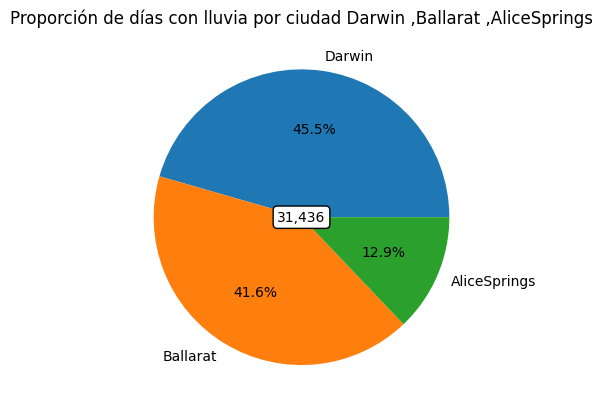

In [41]:
#@title Grafica de circulo

# capturando los datos en la varialbe los datos necesarios que son los dias que lluvieron por gurpo y su total
pdCiudadesLluvia = pdFiltrado[pdFiltrado['RainToday'] == 1].groupby('Location').size()

#ciudades por la que filtraremos
ltsFilCiudades = ['Darwin','Ballarat','AliceSprings']
# los datos de la pdCiudadesLluvia filtrado por la herramienta loc por las ciudades
pdLluviaCiudades = pdCiudadesLluvia.loc[ltsFilCiudades]
# la suma total de los datos
total = pdCiudadesLluvia.sum()

fig, ax = plt.subplots()# llamando ala herramientas de generacion de graficas
# dando los datos que usara el pie que son las que filtramos antes, usando de labels los indice y le decimos que nos imprima porcentajes
ax.pie(pdLluviaCiudades, labels=pdLluviaCiudades.index, autopct='%1.1f%%')

#titulo de la grafica, usando Join para colocar los nombres de las ciudades
ax.set_title(f'Proporción de días con lluvia por ciudad {" ,".join(lstCiudades)}')
# agregando texto en el centro con el total de datos del circulo, junto con un diccionario que tiene los valores que tendra el bbox o el cuadro del texto
ax.text(0, 0, '{:,}'.format(total), ha='center', va='center',bbox=dict(facecolor='white', edgecolor='black', boxstyle='round')) #usando format arreglamos a un numero mas facil de leer
# imprimiendo grafica de circulo
plt.show()


#Descripción gráfico 3

---

En este gráfico se usó la muestra de 3 ciudades con localizaciones estratégicas para representar los 3 tipos de climas presentes en el país: Árido, tropical y templado en el transcurso de los años.
Alice Springs refleja el clima árido y desértico de la zona centro de Australia. En el transcurso de 10 años(3650 días), solamente 470 días habían sido días lluviosos.
Darwin nos muestra cómo sería el clima en una ciudad al norte de Australia, en donde se presenta un clima tropical de sabana, con dos estaciones bien diferenciadas de sí, y en donde se puede presenciar una parte del año con mucha lluvia y humedad, mientras que la otra pasa a ser una más seca y con temperaturas muy elevadas.
Ballarat está ubicada en la zona sur de Australia, que viene siendo una región que se caracteriza por tener un clima templado, con las 4 estaciones bien diferenciadas.

  
En el se puede observar como la tendencia de los climas hace juicio a su nombre,
lo cuál servirá a futuro para contrastarlo con eventos meteorológicos que muestran anormalidades en ciertas zonas.


# Fase de evaluacion de modelos

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `sta

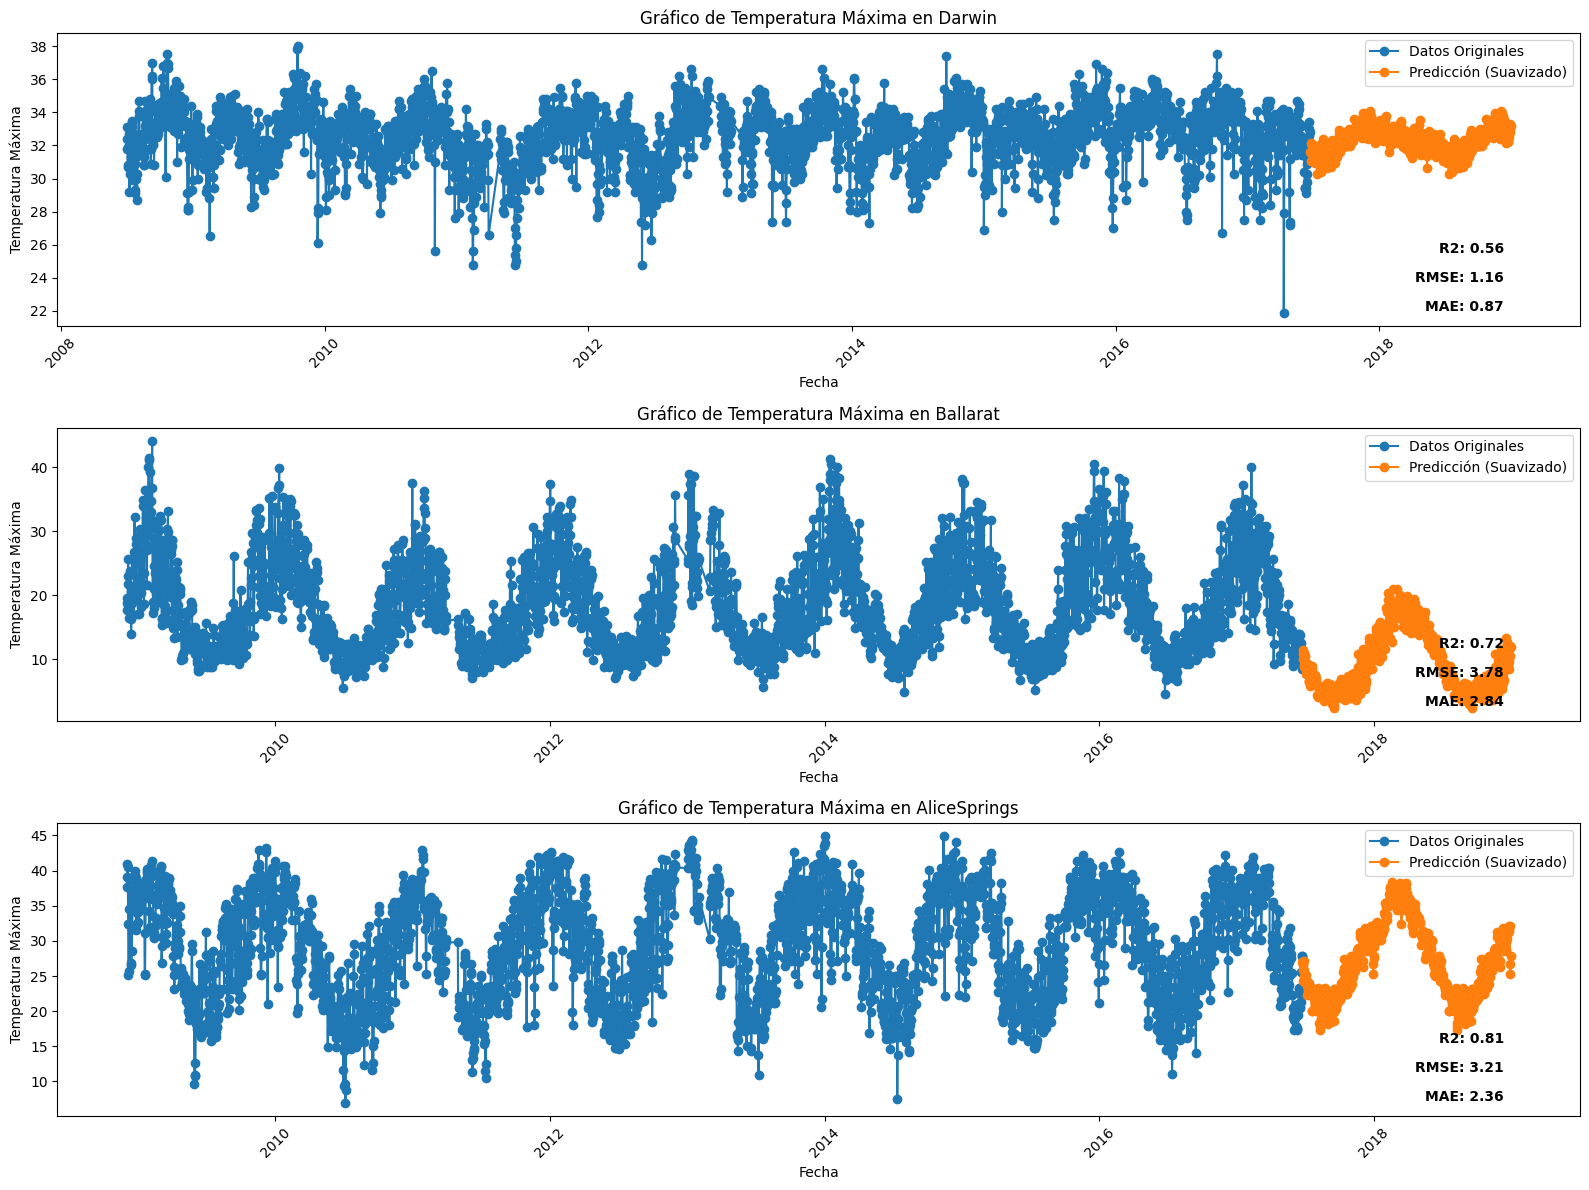

In [77]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Listando las ciudades que vamos a estudiar
ltsFilCiudades = ['Darwin', 'Ballarat', 'AliceSprings']

# Creando subgráficos para cada ciudad
fig, axs = plt.subplots(len(ltsFilCiudades), 1, figsize=(16, 4 * len(ltsFilCiudades)))

# Iterar sobre cada ciudad y generar las líneas de tiempo correspondientes
for i, ciudad in enumerate(ltsFilCiudades):
    # Filtrar los datos para la ubicación de la ciudad
    df_ciudad = pdFiltrado[pdFiltrado['Location'] == ciudad]

    # Obtener los datos de la columna Date y MaxTemp de la ubicación de la ciudad
    fechas = pd.to_datetime(df_ciudad['Date'])
    temperaturas = df_ciudad['MaxTemp']

    # Combinar  fechas y temperaturas un nuevo dataframe
    df = pd.DataFrame({'Fecha': fechas, 'Temperatura': temperaturas})

    # Establecer la fecha como índice
    df.set_index('Fecha', inplace=True)

    # Suavizado  exponencial triple de los datos
    modelo_smoothing = ExponentialSmoothing(df, trend=None, seasonal='add', seasonal_periods=365)
    modelo_smoothing_fit = modelo_smoothing.fit()

    # Generar fechas hasta el final del año actual
    fecha_maxima = df.index.max()
    fecha_fin_anio = pd.to_datetime(datetime.date(datetime.date.today().year - 5, 12, 31))
    fechas_extendidas = pd.date_range(start=fecha_maxima, end=fecha_fin_anio, freq='D')

    # Realizar predicciones extendidas
    temperaturas_prediccion_smoothing = modelo_smoothing_fit.predict(start=0, end=len(df) + len(fechas_extendidas) - 1)

    # Calcular MAE, RMSE, R2
    mae = mean_absolute_error(df['Temperatura'], temperaturas_prediccion_smoothing[:len(df)])
    rmse = mean_squared_error(df['Temperatura'], temperaturas_prediccion_smoothing[:len(df)], squared=False)
    r2 = r2_score(df['Temperatura'], temperaturas_prediccion_smoothing[:len(df)])

    # Gráfico de temperaturas por ciudad
    axs[i].plot(df.index, df['Temperatura'], 'o-', label='Datos Originales')
    axs[i].plot(fechas_extendidas, temperaturas_prediccion_smoothing[-len(fechas_extendidas):], 'o-', label='Predicción (Suavizado)')
    axs[i].set_xlabel('Fecha')
    axs[i].set_ylabel('Temperatura Máxima')
    axs[i].set_title('Gráfico de Temperatura Máxima en {}'.format(ciudad))
    axs[i].legend()
    axs[i].tick_params(axis='x', rotation=45)

    # Mostrar MAE, RMSE, R2 en el gráfico
    axs[i].text(0.95, 0.05, 'MAE: {:.2f}'.format(mae), transform=axs[i].transAxes, fontsize=10, fontweight='bold', ha='right')
    axs[i].text(0.95, 0.15, 'RMSE: {:.2f}'.format(rmse), transform=axs[i].transAxes, fontsize=10, fontweight='bold', ha='right')
    axs[i].text(0.95, 0.25, 'R2: {:.2f}'.format(r2), transform=axs[i].transAxes, fontsize=10, fontweight='bold', ha='right')


# Ajustar la disposición de los subgráficos
plt.tight_layout()

plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-p

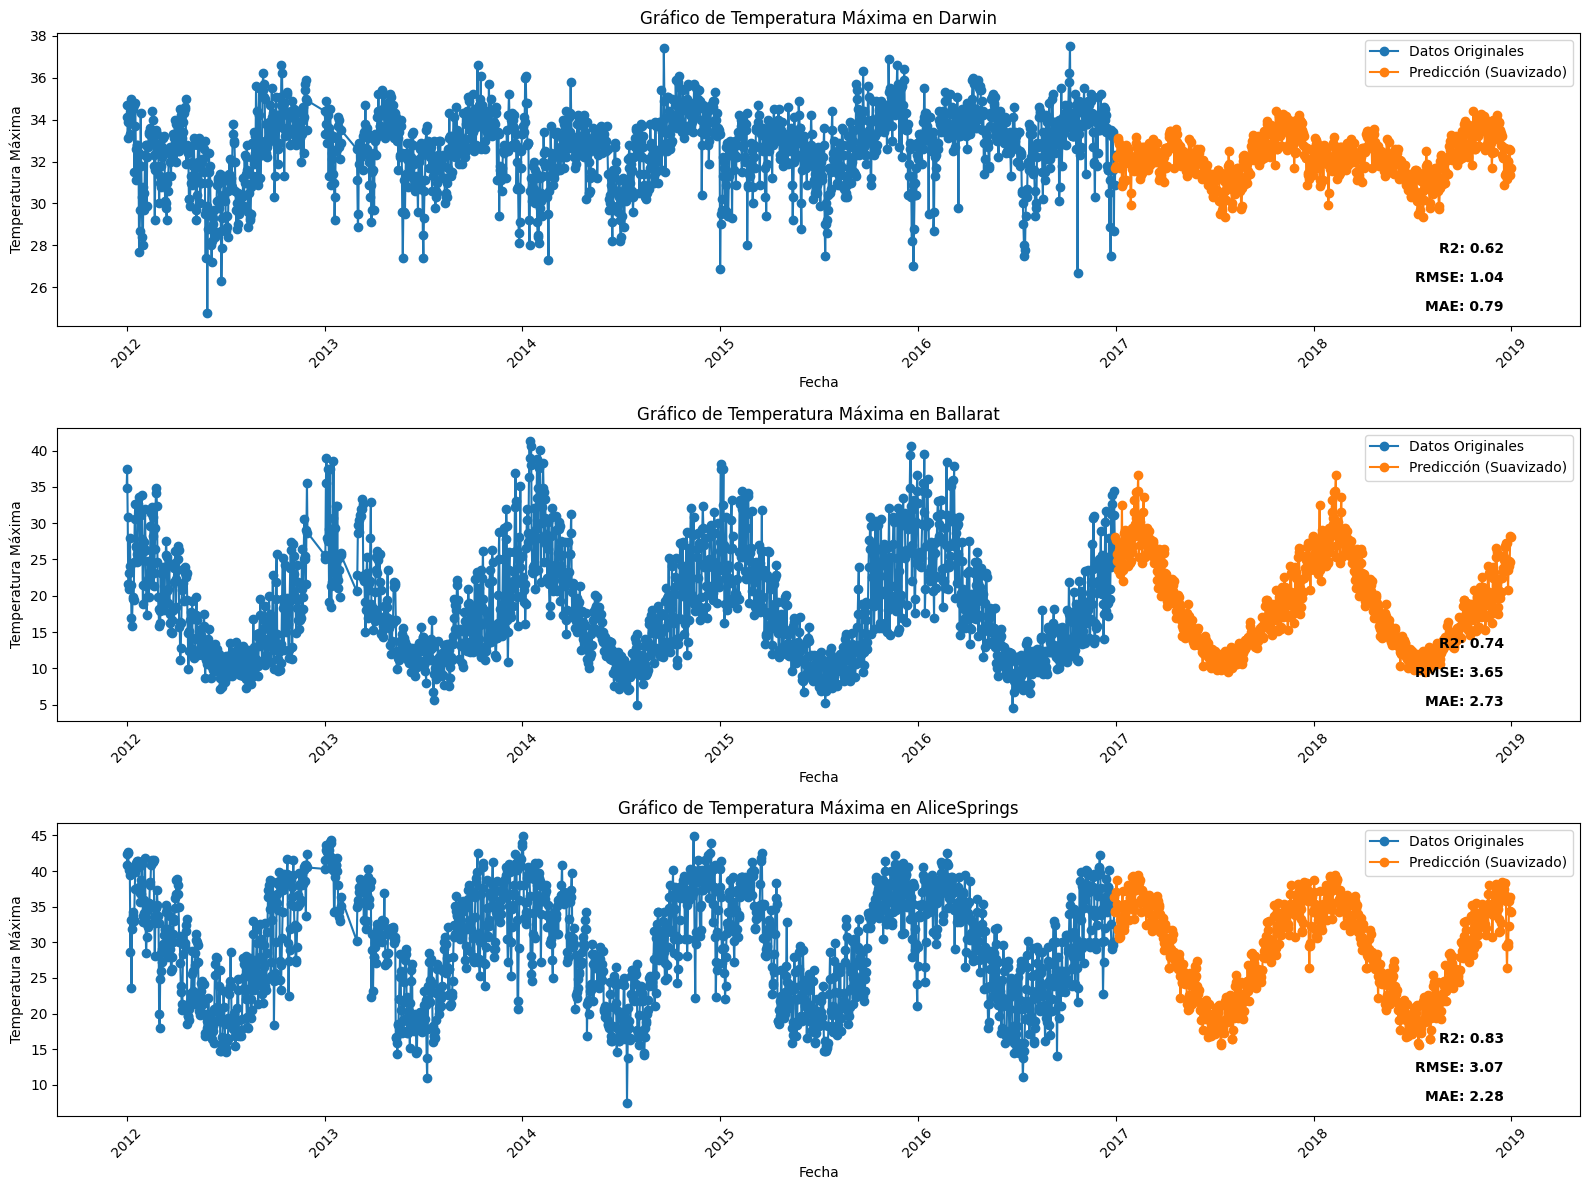

In [66]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Listando las ciudades que vamos a estudiar
ltsFilCiudades = ['Darwin', 'Ballarat', 'AliceSprings']

# Creando subgráficos para cada ciudad
fig, axs = plt.subplots(len(ltsFilCiudades), 1, figsize=(16, 4 * len(ltsFilCiudades)))

# Iterar sobre cada ciudad y generar las líneas de tiempo correspondientes
for i, ciudad in enumerate(ltsFilCiudades):
    # Filtrar los datos para la ubicación de la ciudad y el rango de años
    df_ciudad = pdFiltrado[(pdFiltrado['Location'] == ciudad) & (pdFiltrado['Year'].between(2012, 2016))]

    # Obtener los datos de la columna Date y MaxTemp de la ubicación de la ciudad
    fechas = pd.to_datetime(df_ciudad['Date'])
    temperaturas = df_ciudad['MaxTemp']

    # Combinar fechas y temperaturas en un nuevo dataframe
    df = pd.DataFrame({'Fecha': fechas, 'Temperatura': temperaturas})

    # Establecer la fecha como índice
    df.set_index('Fecha', inplace=True)

    # Suavizado exponencial triple de los datos
    modelo_smoothing = ExponentialSmoothing(df, trend=None, seasonal='add', seasonal_periods=365)
    modelo_smoothing_fit = modelo_smoothing.fit()

    # Generar fechas hasta el final del año actual
    fecha_maxima = df.index.max()
    fecha_fin_anio = pd.to_datetime(datetime.date(2018, 12, 31))
    fechas_extendidas = pd.date_range(start=fecha_maxima, end=fecha_fin_anio, freq='D')

    # Realizar predicciones extendidas
    temperaturas_prediccion_smoothing = modelo_smoothing_fit.predict(start=0, end=len(df) + len(fechas_extendidas) - 1)

    # Calcular MAE, RMSE, R2
    mae = mean_absolute_error(df['Temperatura'], temperaturas_prediccion_smoothing[:len(df)])
    rmse = mean_squared_error(df['Temperatura'], temperaturas_prediccion_smoothing[:len(df)], squared=False)
    r2 = r2_score(df['Temperatura'], temperaturas_prediccion_smoothing[:len(df)])

    # Gráfico de temperaturas por ciudad
    axs[i].plot(df.index, df['Temperatura'], 'o-', label='Datos Originales')
    axs[i].plot(fechas_extendidas, temperaturas_prediccion_smoothing[-len(fechas_extendidas):], 'o-', label='Predicción (Suavizado)')
    axs[i].set_xlabel('Fecha')
    axs[i].set_ylabel('Temperatura Máxima')
    axs[i].set_title('Gráfico de Temperatura Máxima en {}'.format(ciudad))
    axs[i].legend()
    axs[i].tick_params(axis='x', rotation=45)

    # Mostrar MAE, RMSE, R2 en el gráfico
    axs[i].text(0.95, 0.05, 'MAE: {:.2f}'.format(mae), transform=axs[i].transAxes, fontsize=10, fontweight='bold', ha='right')
    axs[i].text(0.95, 0.15, 'RMSE: {:.2f}'.format(rmse), transform=axs[i].transAxes, fontsize=10, fontweight='bold', ha='right')
    axs[i].text(0.95, 0.25, 'R2: {:.2f}'.format(r2), transform=axs[i].transAxes, fontsize=10, fontweight='bold', ha='right')

# Ajustar la disposición de los subgráficos
plt.tight_layout()

plt.show()


In [74]:
import pandas as pd
import plotly.express as px

# Filtrar los datos para una ciudad específica y rango de años
df_ciudad = pdFiltrado[(pdFiltrado['Year'].between(2014, 2016))]

# Crear un gráfico interactivo utilizando Plotly Express
fig = px.scatter(df_ciudad, x='Date', y='MaxTemp', title='Gráfico de Temperatura Máxima todas las ciudades')

# Mostrar el gráfico interactivo
fig.show()


In [70]:
import datetime
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Listando las ciudades que vamos a estudiar
ltsFilCiudades = ['Darwin', 'Ballarat', 'AliceSprings']

# Creando una lista para almacenar los gráficos interactivos
figs = []

# Iterar sobre cada ciudad y generar las líneas de tiempo correspondientes
for i, ciudad in enumerate(ltsFilCiudades):
    # Filtrar los datos para la ubicación de la ciudad y el rango de años
    df_ciudad = pdFiltrado[(pdFiltrado['Location'] == ciudad) & (pdFiltrado['Year'].between(2012, 2016))]

    # Obtener los datos de la columna Date y MaxTemp de la ubicación de la ciudad
    fechas = pd.to_datetime(df_ciudad['Date'])
    temperaturas = df_ciudad['MaxTemp']

    # Combinar fechas y temperaturas en un nuevo dataframe
    df = pd.DataFrame({'Fecha': fechas, 'Temperatura': temperaturas})

    # Establecer la fecha como índice
    df.set_index('Fecha', inplace=True)

    # Suavizado exponencial triple de los datos
    modelo_smoothing = ExponentialSmoothing(df, trend=None, seasonal='add', seasonal_periods=365)
    modelo_smoothing_fit = modelo_smoothing.fit()

    # Generar fechas hasta el final del año actual
    fecha_maxima = df.index.max()
    fecha_fin_anio = pd.to_datetime(datetime.date(2017, 12, 31))
    fechas_extendidas = pd.date_range(start=fecha_maxima, end=fecha_fin_anio, freq='D')

    # Realizar predicciones extendidas
    temperaturas_prediccion_smoothing = modelo_smoothing_fit.predict(start=0, end=len(df) + len(fechas_extendidas) - 1)

    # Gráfico de temperaturas por ciudad
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df.index, y=df['Temperatura'], mode='lines', name='Datos Originales'))
    fig.add_trace(go.Scatter(x=fechas_extendidas, y=temperaturas_prediccion_smoothing[-len(fechas_extendidas):], mode='lines', name='Predicción (Suavizado)'))
    fig.update_layout(title='Gráfico de Temperatura Máxima en {}'.format(ciudad),
                      xaxis_title='Fecha',
                      yaxis_title='Temperatura Máxima')
    figs.append(fig)

# Mostrar todos los gráficos
for fig in figs:
    fig.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated

In [75]:
import datetime
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Listando las ciudades que vamos a estudiar
ltsFilCiudades = ['Darwin', 'Ballarat', 'AliceSprings']

# Creando una lista para almacenar los gráficos interactivos
figs = []

# Iterar sobre cada ciudad y generar las líneas de tiempo correspondientes
for i, ciudad in enumerate(ltsFilCiudades):
    # Filtrar los datos para la ubicación de la ciudad y el rango de años
    df_ciudad = pdFiltrado[(pdFiltrado['Location'] == ciudad) & (pdFiltrado['Year'].between(2012, 2016))]

    # Obtener los datos de la columna Date y MaxTemp de la ubicación de la ciudad
    fechas = pd.to_datetime(df_ciudad['Date'])
    temperaturas = df_ciudad['MaxTemp']

    # Combinar fechas y temperaturas en un nuevo dataframe
    df = pd.DataFrame({'Fecha': fechas, 'Temperatura': temperaturas})

    # Establecer la fecha como índice
    df.set_index('Fecha', inplace=True)

    # Suavizado exponencial triple de los datos
    modelo_smoothing = ExponentialSmoothing(df, trend=None, seasonal='add', seasonal_periods=365)
    modelo_smoothing_fit = modelo_smoothing.fit()

    # Generar fechas hasta el final del año actual
    fecha_maxima = df.index.max()
    fecha_fin_anio = pd.to_datetime(datetime.date(2018, 12, 31))
    fechas_extendidas = pd.date_range(start=fecha_maxima, end=fecha_fin_anio, freq='D')

    # Realizar predicciones extendidas
    temperaturas_prediccion_smoothing = modelo_smoothing_fit.predict(start=0, end=len(df) + len(fechas_extendidas) - 1)

    # Calcular MAE, RMSE, R2
    mae = mean_absolute_error(df['Temperatura'], temperaturas_prediccion_smoothing[:len(df)])
    rmse = mean_squared_error(df['Temperatura'], temperaturas_prediccion_smoothing[:len(df)], squared=False)
    r2 = r2_score(df['Temperatura'], temperaturas_prediccion_smoothing[:len(df)])

    # Gráfico de temperaturas por ciudad
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df.index, y=df['Temperatura'], mode='markers', name='Datos Originales'))
    fig.add_trace(go.Scatter(x=fechas_extendidas, y=temperaturas_prediccion_smoothing[-len(fechas_extendidas):], mode='lines', name='Predicción (Suavizado)'))
    fig.update_layout(title='Gráfico de Temperatura Máxima en {}'.format(ciudad),
                      xaxis_title='Fecha',
                      yaxis_title='Temperatura Máxima')

    # Agregar etiquetas de MAE, RMSE y R2
    fig.add_annotation(text='MAE: {:.2f}'.format(mae), xref='paper', yref='paper', x=0.95, y=0.05, showarrow=False, font=dict(size=10, color='black'))
    fig.add_annotation(text='RMSE: {:.2f}'.format(rmse), xref='paper', yref='paper', x=0.95, y=0.15, showarrow=False, font=dict(size=10, color='black'))
    fig.add_annotation(text='R2: {:.2f}'.format(r2), xref='paper', yref='paper', x=0.95, y=0.25, showarrow=False, font=dict(size=10, color='black'))

    figs.append(fig)

# Mostrar todos los gráficos
for fig in figs:
    fig.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated

In [78]:
import datetime
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Listando las ciudades que vamos a estudiar
ltsFilCiudades = ['Darwin', 'Ballarat', 'AliceSprings']

# Creando una lista para almacenar los gráficos interactivos
figs = []

# Iterar sobre cada ciudad y generar las líneas de tiempo correspondientes
for i, ciudad in enumerate(ltsFilCiudades):
    # Filtrar los datos para la ubicación de la ciudad y el rango de años
    df_ciudad = pdFiltrado[(pdFiltrado['Location'] == ciudad) & (pdFiltrado['Year'].between(2012, 2016))]

    # Obtener los datos de la columna Date y MaxTemp de la ubicación de la ciudad
    fechas = pd.to_datetime(df_ciudad['Date'])
    temperaturas = df_ciudad['MaxTemp']

    # Combinar fechas y temperaturas en un nuevo dataframe
    df = pd.DataFrame({'Fecha': fechas, 'Temperatura': temperaturas})

    # Establecer la fecha como índice
    df.set_index('Fecha', inplace=True)

    # Suavizado exponencial triple de los datos
    modelo_smoothing = ExponentialSmoothing(df, trend=None, seasonal='add', seasonal_periods=365)
    modelo_smoothing_fit = modelo_smoothing.fit()

    # Generar fechas hasta el final del año actual
    fecha_maxima = df.index.max()
    fecha_fin_anio = pd.to_datetime(datetime.date(2018, 12, 31))
    fechas_extendidas = pd.date_range(start=fecha_maxima, end=fecha_fin_anio, freq='D')

    # Realizar predicciones extendidas
    temperaturas_prediccion_smoothing = modelo_smoothing_fit.predict(start=0, end=len(df) + len(fechas_extendidas) - 1)

    # Calcular MAE, RMSE, R2
    mae = mean_absolute_error(df['Temperatura'], temperaturas_prediccion_smoothing[:len(df)])
    rmse = mean_squared_error(df['Temperatura'], temperaturas_prediccion_smoothing[:len(df)], squared=False)
    r2 = r2_score(df['Temperatura'], temperaturas_prediccion_smoothing[:len(df)])

    # Gráfico de temperaturas por ciudad
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df.index, y=df['Temperatura'], mode='markers', name='Datos Originales'))
    fig.add_trace(go.Scatter(x=fechas_extendidas, y=temperaturas_prediccion_smoothing[-len(fechas_extendidas):], mode='lines', name='Predicción (Suavizado)'))
    fig.update_layout(title='Gráfico de Temperatura Máxima en {}'.format(ciudad),
                      xaxis_title='Fecha',
                      yaxis_title='Temperatura Máxima')

    # Agregar etiquetas de MAE, RMSE y R2
    fig.add_annotation(text='MAE: {:.2f}'.format(mae), xref='paper', yref='paper', x=0.5, y=-0.15, showarrow=False, font=dict(size=10, color='black'))
    fig.add_annotation(text='RMSE: {:.2f}'.format(rmse), xref='paper', yref='paper', x=0.5, y=-0.25, showarrow=False, font=dict(size=10, color='black'))
    fig.add_annotation(text='R2: {:.2f}'.format(r2), xref='paper', yref='paper', x=0.5, y=-0.35, showarrow=False, font=dict(size=10, color='black'))

    figs.append(fig)

# Mostrar todos los gráficos
for fig in figs:
    fig.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated